In [1]:
%load_ext autoreload
%autoreload 2

from sympy import *
from safe_region_utils import *
from symbolic_utils import *
init_printing()

# ACAS X Example

## Define a polygon

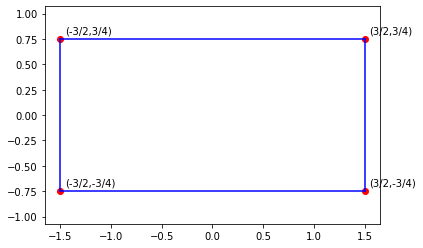

In [73]:
w = 0.75
rect_points: list = [
    geometry.Point(val)
    for val in [[2 * w, -w], [2 * w, w], [-2 * w, w], [-2 * w, -w]]
]
rectangle: geometry.Polygon = Polygon(*rect_points)
plot_polygon(rectangle)

## Define a trajectory

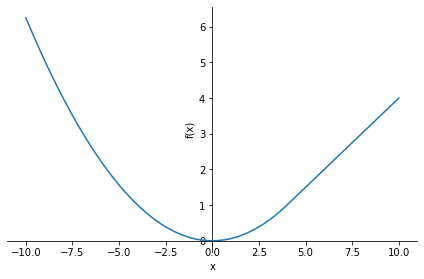

In [2]:
x, y = symbols("x y")

traj_piecewise = Piecewise(
                    (x**2 / 16, x < 4),
                    (x/2 - 1, x >= 4))
plot(traj_piecewise)

## Define domain and plotting bounds

In [75]:
domain = Interval(-6, 15)
xbounds = (domain.inf-3, domain.sup+3)
ybounds = (-2, 9)

In [76]:
example_name = "ACAS X Climb with Rectangle"

cond = compute_unsafe_cond(
    x, y,
    rectangle,
    traj_piecewise,
    domain = domain, 
)
cond

solveset solution: EmptySet
solveset solution: {0}
solution when finding transitions for angle pi: {0}
solveset solution: EmptySet
solveset solution: {0}
solution when finding transitions for angle 0: {0}
pair used for transition point finding: {x: 0}
pair used for transition point finding: {x: 0}
solveset solution: EmptySet
solveset solution: EmptySet
solveset solution: EmptySet
solveset solution: EmptySet


⎛                                                         ⎛    ⎛⎧   9/4      for x < -15/2⎞    ⎞ ⎛    ⎛⎧
⎜                                                         ⎜    ⎜⎪                         ⎟    ⎟ ⎜    ⎜⎪
⎜                                                         ⎜    ⎜⎪         2               ⎟    ⎟ ⎜    ⎜⎪
⎜                      ⎛3⋅x   3⋅y⎞ ⎛3⋅x   3⋅y   63⎞       ⎜    ⎜⎪(x + 3/2)                ⎟   3⎟ ⎜    ⎜⎪
⎜x ≥ -15/2 ∧ x ≤ 3/2 ∧ ⎜─── - ───⎟⋅⎜─── - ─── + ──⎟ ≤ 0 ∧ ⎜y - ⎜⎨──────────  for x ≤ -3/2 ⎟ + ─⎟⋅⎜y - ⎜⎨
⎜                      ⎝ 4     2 ⎠ ⎝ 4     2    8 ⎠       ⎜    ⎜⎪    16                   ⎟   4⎟ ⎜    ⎜⎪
⎜                                                         ⎜    ⎜⎪                         ⎟    ⎟ ⎜    ⎜⎪
⎜                                                         ⎜    ⎜⎪    0         otherwise  ⎟    ⎟ ⎜    ⎜⎪
⎝                                                         ⎝    ⎝⎩                         ⎠    ⎠ ⎝    ⎝⎩

   9/4      for x < -9/2⎞    ⎞    ⎞   ⎛               

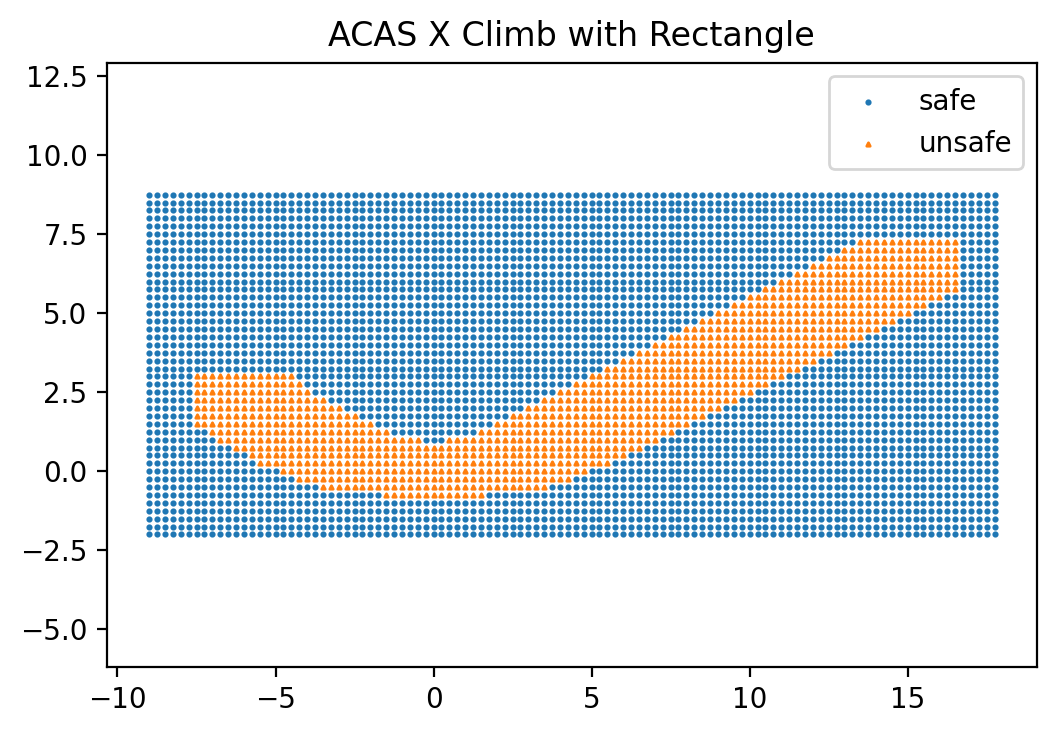


Show[
    RegionPlot[((9/4 - 3*x/2 >= 0) && (9/4 - 3*y >= 0) && (3*x/2 + 9/4 >= 0) && (3*y + 9/4 >= 0)) || ((21/4 - 3*y >= 0) && (33/4 - 3*x/2 >= 0) && (3*x/2 - 15/4 >= 0) && (3*y - 3/4 >= 0)) || ((9 - 3*y >= 0) && (-3*x/2 - 27/4 >= 0) && (3*x/2 + 45/4 >= 0) && (3*y - 9/2 >= 0)) || ((87/4 - 3*y >= 0) && (99/4 - 3*x/2 >= 0) && (3*x/2 - 81/4 >= 0) && (3*y - 69/4 >= 0)) || ((9/4 - 3*x/2 <= 0) && (9/4 - 3*y <= 0) && (3*x/2 + 9/4 <= 0) && (3*y + 9/4 <= 0)) || ((21/4 - 3*y <= 0) && (33/4 - 3*x/2 <= 0) && (3*x/2 - 15/4 <= 0) && (3*y - 3/4 <= 0)) || ((9 - 3*y <= 0) && (-3*x/2 - 27/4 <= 0) && (3*x/2 + 45/4 <= 0) && (3*y - 9/2 <= 0)) || ((87/4 - 3*y <= 0) && (99/4 - 3*x/2 <= 0) && (3*x/2 - 81/4 <= 0) && (3*y - 69/4 <= 0)) || ((x >= 5/2) && (x <= 33/2) && ((3*x/4 + 3*y/2 - 21)*(3*x/4 + 3*y/2 - 9/2) <= 0) && ((y - Piecewise[{{1, x < 5/2}, {x/2 - 1/4, x <= 27/2}, {13/2, True}}] - 3/4)*(y - Piecewise[{{1, x < 11/2}, {x/2 - 7/4, x <= 33/2}, {13/2, True}}] + 3/4) <= 0)) || ((x >= -15/2) && (x <= 3/2)

In [77]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name)
mathematica_output = print_mathematica(x, y, cond, xbounds, ybounds, traj_piecewise, rectangle)
print(mathematica_output)

# UAV top-down collision avoidance

## Define a polygon

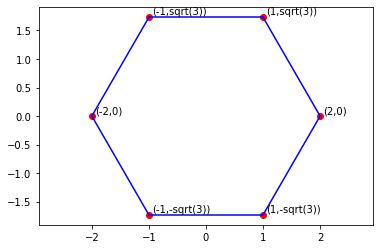

In [3]:
rp = 2
hexagon = RegularPolygon(Point(0, 0), rp, 6)

plot_polygon(hexagon)

## Define a trajectory

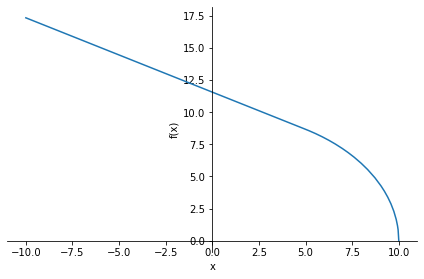

In [4]:
R = 10
theta = pi/3
# y = sqrt(R**2 - x**2)
bound = R / sqrt(tan(theta)**2 + 1)

traj_piecewise = Piecewise(
                    (sqrt(R**2 - x**2), x > bound),
                    (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))
plot(traj_piecewise)

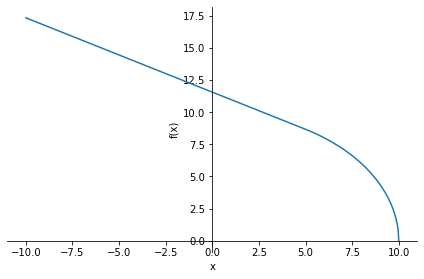

⎧         _________                                
⎪        ╱  2    2                        R        
⎪      ╲╱  R  - x          for x > ────────────────
⎪                                     _____________
⎪                                    ╱    2        
⎨                                  ╲╱  tan (θ) + 1 
⎪                                                  
⎪           -R⋅cos(θ) + x                          
⎪R⋅sin(θ) - ─────────────         otherwise        
⎪               tan(θ)                             
⎩                                                  

In [5]:
R = Symbol("R", real=True, positive=True, nonzero=True) 
theta = Symbol('theta', real=True, positive=True, nonzero=True)
bound = R / sqrt(tan(theta)**2 + 1)

traj_piecewise = Piecewise(
                    (sqrt(R**2 - x**2), x > bound),
                    (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))
plot(traj_piecewise.subs(R, 10).subs(theta, pi/3))
traj_piecewise

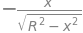

In [6]:
diff(sqrt(R**2 - x**2), x)

In [279]:
transitions, lookup = compute_all_transitions(
    x, y,
    hexagon,
    traj_piecewise,
    domain = Reals, 
    intervals = [Interval(bound, R), Interval(-oo, bound)],
)
transitions

{Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R, 0),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Transition(-sqrt(3)*R/2, R/2),
 Transition(0, R),
 Transition(sqrt(3)*R/2, R/2)}

In [302]:
from symbolic_utils import *

In [303]:
func_var

In [316]:
transitions

{Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R, 0),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Transition(-sqrt(3)*R/2, R/2),
 Transition(0, R),
 Transition(sqrt(3)*R/2, R/2)}

In [324]:
t0 = time.time()
transition_orderings = sort_or_order(transitions, lookup, func_var)
print(f"Took {time.time()-t0} seconds to compute", 
      f"{len(transition_orderings)} possible orderings.")
transition_orderings

Took 0.0011157989501953125 seconds to compute 4 possible orderings.


[[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Transition(0, R),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Transition(sqrt(3)*R/2, R/2),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(

In [333]:
t0 = time.time()
clauses = [generate_clause(x,y, hexagon, traj_piecewise, sorted_transitions, lookup)
           for sorted_transitions in transition_orderings]
print(f"Took {time.time()-t0} seconds to compute {len(clauses)} clauses")

Took 0.45810508728027344 seconds to compute 4 clauses


In [327]:
clauses[0]

                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R            
⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 2
⎜                           ⎜    ⎜⎪                      tan(θ)                        _____________    
⎜                           ⎜    ⎜⎪                                                   ╱    2            
⎜                           ⎜    ⎜⎪                    

In [328]:
clauses[1]

                                                                                                        
                                                                                                        
⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R            
⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 2
⎜                           ⎜    ⎜⎪                      tan(θ)                        _____________    
⎜                           ⎜    ⎜⎪                                                   ╱    2            
⎜                           ⎜    ⎜⎪                                                 ╲╱  tan (θ) + 1     
⎜           R               ⎜    ⎜⎪                                                                     
⎜x ≤ ──────────────── + 2 ∧ ⎜y - ⎜⎨                              R                                      
⎜       _____________       ⎜    ⎜⎪           -R⋅cos(θ)

In [329]:
clauses[2]

                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R            
⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 2
⎜                           ⎜    ⎜⎪                    

In [330]:
clauses[3]

                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R            
⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 2
⎜                           ⎜    ⎜⎪                      tan(θ)                        _____________    
⎜                           ⎜    ⎜⎪                    

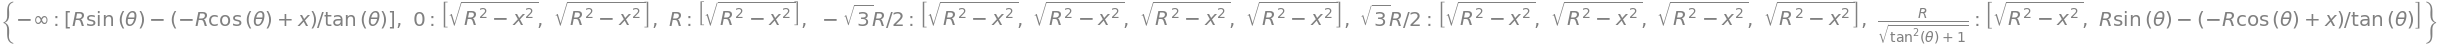

In [331]:
lookup

## IDEA
- first, pull out infinities
- then generate all permutations
- discard permutations that do not obey what we know
    - just step through and check relative ordering

### eventually
write my own sorting algorithm?? that branches based when it fails to make a comparison

In [78]:
import itertools
import time

In [207]:
def check_ordering(ordering, verbose=False):
    # TODO: make this more efficient (nlogn somehow)
    for i, elem1 in enumerate(ordering):
        # check if each element smaller than successive ones
        for elem2 in ordering[i+1:]:
            try:
                if verbose:
                    print(f"ensuring {elem1} < {elem2}")
                if elem1 > elem2:
                    return False
            except TypeError:
                pass
    return True

In [ ]:
def reconstruct_transition_points(transitions, ordering, add_neg_inf, add_pos_inf):
    # construct dict mapping x-val (or y-val) to transition object
    var_to_transition: Dict = {}
    for transition in transitions:
        lookup_coord = getattr(transition.point, str(func_var))
        if lookup_coord in var_to_transition:
            var_to_transition[lookup_coord].append(transition)
        else:
            var_to_transition[lookup_coord] = [transition]
    
    ordered_transitions = []
    # use extend because var_to_transition maps coordinates (x or y) to lists
    if add_neg_inf:
        ordered_transitions.extend(var_to_transition[-oo])
    elif not var_to_transition[ordering[0]].is_bound:
        # must begin with a boundary type transition point
        return []
    if add_pos_inf:
        ordered_transitions.extend(var_to_transition[oo])
    elif not var_to_transition[ordering[-1]].is_bound:
#         must also end with a boundary type transition point
        return []

    for coord in ordering:
        ordered_transitions.extend(var_to_transition[coord])
    return ordered_transitions

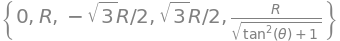

In [208]:
add_neg_inf = False
add_pos_inf = False
txl = set(map(lambda tp: getattr(tp.point, str(func_var)), transitions))
if -oo in txl:
    add_neg_inf = True
    txl.remove(-oo)
if oo in txl:
    add_pos_inf = True
    txl.remove(oo)
txl

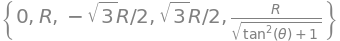

In [285]:
txl

In [286]:
transitions

{Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R, 0),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Transition(-sqrt(3)*R/2, R/2),
 Transition(0, R),
 Transition(sqrt(3)*R/2, R/2)}

In [288]:
boundaries = list(filter(lambda t: t.is_bound, transitions))
boundaries

[Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R, 0),
 Boundary(-oo, R*sin(theta) + oo/tan(theta))]

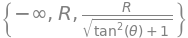

In [291]:
bxs = set(map(lambda tp: getattr(tp.point, str(func_var)), 
              filter(lambda t: t.is_bound, transitions)))
bxs

In [290]:
true_transitions = list(filter(lambda t: not t.is_bound, transitions))
true_transitions

[Transition(sqrt(3)*R/2, R/2), Transition(0, R), Transition(-sqrt(3)*R/2, R/2)]

In [293]:
txs = set(map(lambda tp: getattr(tp.point, str(func_var)), 
              filter(lambda t: not t.is_bound, transitions)))
txs

In [297]:
pretty_print(list(itertools.permutations(txs, 0)))
pretty_print(list(itertools.permutations(txs, 1)))
pretty_print(list(itertools.permutations(txs, 2)))
pretty_print(list(itertools.permutations(txs, 3)))

⎡⎛   √3⋅R⎞  ⎛   -√3⋅R ⎞  ⎛√3⋅R   ⎞  ⎛√3⋅R  -√3⋅R ⎞  ⎛-√3⋅R    ⎞  ⎛-√3⋅R   √3⋅R⎞⎤
⎢⎜0, ────⎟, ⎜0, ──────⎟, ⎜────, 0⎟, ⎜────, ──────⎟, ⎜──────, 0⎟, ⎜──────, ────⎟⎥
⎣⎝    2  ⎠  ⎝     2   ⎠  ⎝ 2     ⎠  ⎝ 2      2   ⎠  ⎝  2      ⎠  ⎝  2      2  ⎠⎦


In [298]:
pretty_print(list(itertools.combinations(txs, 0)))
pretty_print(list(itertools.combinations(txs, 1)))
pretty_print(list(itertools.combinations(txs, 2)))
pretty_print(list(itertools.combinations(txs, 3)))

[()]
⎡      ⎛√3⋅R ⎞  ⎛-√3⋅R  ⎞⎤
⎢(0,), ⎜────,⎟, ⎜──────,⎟⎥
⎣      ⎝ 2   ⎠  ⎝  2    ⎠⎦
⎡⎛   √3⋅R⎞  ⎛   -√3⋅R ⎞  ⎛√3⋅R  -√3⋅R ⎞⎤
⎢⎜0, ────⎟, ⎜0, ──────⎟, ⎜────, ──────⎟⎥
⎣⎝    2  ⎠  ⎝     2   ⎠  ⎝ 2      2   ⎠⎦
⎡⎛   √3⋅R  -√3⋅R ⎞⎤
⎢⎜0, ────, ──────⎟⎥
⎣⎝    2      2   ⎠⎦


In [301]:
for i in range(len(txs)+1):
    for comb in itertools.combinations(txs, i):
        print(bxs | set(comb))

{R/sqrt(tan(theta)**2 + 1), -oo, R}
{0, R/sqrt(tan(theta)**2 + 1), -oo, R}
{R/sqrt(tan(theta)**2 + 1), sqrt(3)*R/2, -oo, R}
{R/sqrt(tan(theta)**2 + 1), -sqrt(3)*R/2, -oo, R}
{0, R/sqrt(tan(theta)**2 + 1), sqrt(3)*R/2, -oo, R}
{0, R/sqrt(tan(theta)**2 + 1), -sqrt(3)*R/2, -oo, R}
{R/sqrt(tan(theta)**2 + 1), sqrt(3)*R/2, -oo, R, -sqrt(3)*R/2}
{0, R/sqrt(tan(theta)**2 + 1), sqrt(3)*R/2, -oo, R, -sqrt(3)*R/2}


In [209]:
oo in txs

False

In [210]:
-oo in txs

True

In [211]:
len(list(all_orderings))

In [212]:
all_orderings = itertools.permutations(txl)

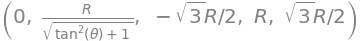

In [213]:
all_orderings = itertools.permutations(txl)
o1 = list(all_orderings)[0]
o1

In [214]:
check_ordering(o1)

False

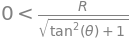

In [215]:
o1[0] < o1[1]

In [234]:
t0 = time.time()
all_orderings = itertools.permutations(txl)
possible_orderings = []
count = 0
for ordering in all_orderings:
    count += 1
    if check_ordering(ordering):
        possible_orderings.append(ordering)
print(f"took {time.time() - t0} sec to check {count} possible orderings and find {len(possible_orderings)} valid ones")

took 0.005208730697631836 sec to check 120 possible orderings and find 8 valid ones


## try reconstructing

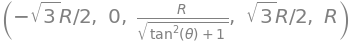

In [235]:
p0

In [236]:
transitions

{Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R, 0),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Transition(-sqrt(3)*R/2, R/2),
 Transition(0, R),
 Transition(sqrt(3)*R/2, R/2)}

In [240]:
# construct dict mapping x-val (or y-val) to transition object
var_to_transition: Dict = {}
for transition in transitions:
    lookup_coord = getattr(transition.point, str(func_var))
    if lookup_coord in var_to_transition:
        var_to_transition[lookup_coord].append(transition)
    else:
        var_to_transition[lookup_coord] = [transition]
        
var_to_transition

{sqrt(3)*R/2: [Transition(sqrt(3)*R/2, R/2)],
 -sqrt(3)*R/2: [Transition(-sqrt(3)*R/2, R/2)],
 0: [Transition(0, R)],
 R/sqrt(tan(theta)**2 + 1): [Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1)))],
 -oo: [Boundary(-oo, R*sin(theta) + oo/tan(theta))],
 R: [Boundary(R, 0)]}

In [250]:
ordered_transitions = []
# use extend because var_to_transition maps coordinates (x or y) to lists
if add_neg_inf:
    ordered_transitions.extend(var_to_transition[-oo])
if add_pos_inf:
    ordered_transitions.extend(var_to_transition[oo])
for coord in possible_orderings[0]:
    ordered_transitions.extend(var_to_transition[coord])
ordered_transitions

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Transition(-sqrt(3)*R/2, R/2),
 Transition(0, R),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Boundary(R, 0),
 Transition(sqrt(3)*R/2, R/2)]

In [251]:
ordered_transitions = []
# use extend because var_to_transition maps coordinates (x or y) to lists
if add_neg_inf:
    ordered_transitions.extend(var_to_transition[-oo])
if add_pos_inf:
    ordered_transitions.extend(var_to_transition[oo])
for coord in possible_orderings[1]:
    ordered_transitions.extend(var_to_transition[coord])
ordered_transitions

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Transition(-sqrt(3)*R/2, R/2),
 Transition(0, R),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Transition(sqrt(3)*R/2, R/2),
 Boundary(R, 0)]

In [217]:
len(possible_orderings)

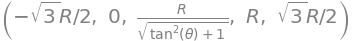

In [218]:
possible_orderings[0]

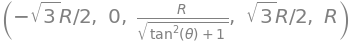

In [219]:
possible_orderings[1]

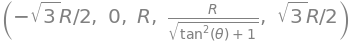

In [220]:
possible_orderings[2]

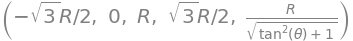

In [168]:
possible_orderings[3]

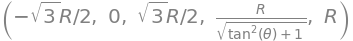

In [169]:
possible_orderings[4]

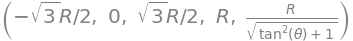

In [170]:
possible_orderings[5]

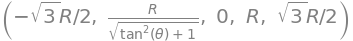

In [171]:
possible_orderings[6]

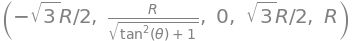

In [172]:
possible_orderings[7]

In [189]:
sqrt(tan(theta)**2 + 1) > 0

True

In [190]:
R > 0

True

In [231]:
c = Symbol("c", real=True, positive=True, nonzero=True) 
(c > sqrt(3)/2*c).doit()

In [233]:
1 > sqrt(3)/2

True

In [224]:
R > sqrt(3)*R/2

In [225]:
R < sqrt(3)*R/2

In [232]:
1 > sqrt(3)*R/2

In [195]:
check_ordering(possible_orderings[6], True)

TypeError: check_ordering() takes 1 positional argument but 2 were given

In [196]:
check_ordering(possible_orderings[7], verbose=True)

TypeError: check_ordering() got an unexpected keyword argument 'verbose'

In [174]:
possible_orderings[7][0] < possible_orderings[7][1]

True

In [175]:
possible_orderings[7][1] < possible_orderings[7][2]

False

In [14]:
func_var = x
sorted(transitions, key=lambda tp: getattr(tp.point, str(func_var)),)

TypeError: cannot determine truth value of Relational

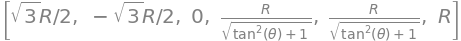

In [59]:
txl

In [58]:
print(list(all_orderings))

[]


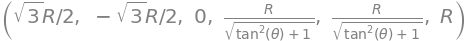

In [67]:
o1

In [70]:
def check_ordering(ordering):
    # TODO: make this more efficient (nlogn somehow)
    for i, elem1 in enumerate(ordering):
        # check if each element smaller than successive ones
        for elem2 in ordering[i+1:]:
            try:
                if elem1 > elem2:
                    return False
            except TypeError:
                return True

In [71]:
check_ordering(o1)

False

## Define domain and plot bounds

In [ ]:
domain = Interval(-12, 10)
xbounds = (domain.inf-3, domain.sup+3)
ybounds = (-3, 19)

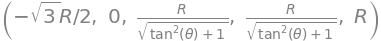

In [68]:
o1[0+1:]

## Run algorithm

In [ ]:
example_name = "Top-Down UAV Trajectory"

cond = compute_unsafe_cond(
    x, y,
    hexagon,
    traj_piecewise,
    domain = domain, 
)
cond

In [ ]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name, resolution=0.75)
mathematica_output = print_mathematica(x, y, cond, xbounds, ybounds, traj_piecewise, hexagon)
print(mathematica_output)

# Short Examples

In [ ]:
w = 0.5
square_points: list = [
    geometry.Point(val) for val in [[w, -w], [w, w], [-w, w], [-w, -w]]
]
square: geometry.Polygon = Polygon(*square_points)

traj_piecewise = Piecewise(
                    (sin(x/2), x < 0),
                    (x/2, x >= 0))
plot(traj_piecewise)

In [ ]:
domain = Interval(-12, 9)
xbounds = [-15, 12]
ybounds = [-3, 9]

cond = compute_unsafe_cond(
    x,
    y,
    square,
    traj_piecewise,
    domain,
)

cond

In [ ]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name)
mathematica_output = print_mathematica(x, y, cond, xbounds, ybounds, traj_piecewise, square, False)
print(mathematica_output)

## Testing $x = f(y)$

In [ ]:
square: geometry.Polygon = Polygon(*square_points)
plot_polygon(square)

domain = Interval(0, 10)
traj_piecewise = Piecewise((4*sqrt(y), y < 1), (2*y + 2, y >= 1))
# plot_implicit(traj_piecewise)

In [ ]:
domain = Interval(0, 4)
xbounds = [-2, 12]
ybounds = [-2, 6]

cond = compute_unsafe_cond(
    x,
    y,
    square,
    traj_piecewise,
    domain,
)
cond

In [ ]:
mathematica_command = print_mathematica(x, y, cond, xbounds, ybounds, traj_piecewise, square)
print(mathematica_command)

In [ ]:
plot_condition(x, y, cond, xbounds, ybounds, title="f(y)")

## Symbolic [in progress]

In [ ]:
a = Symbol("a", real=True, nonzero=True)
b = Symbol("b", real=True, nonzero=True)
c = Symbol("c", real=True, nonzero=True)

w = Symbol("w", real=True, positive=True, nonzero=True)
square_points: list = [
    geometry.Point(val) for val in [[w, -w], [w, w], [-w, w], [-w, -w]]
]
square_param: geometry.Polygon = Polygon(*square_points)

domain = Interval(-12, 9)
xbounds = [-15, 12]
ybounds = [-3, 6]
example_name = "Symbolic parabola"

traj = a*x**2 + b*x +c

cond = compute_unsafe_cond_symbolic(
    x,
    y,
    square_param,
    traj,
    Reals,
    add_notches=True,
)
cond

In [ ]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name)

In [ ]:
plot_condition(x, y, cond.subs(a, 1/4).subs(b, 1).subs(c, 2).subs(w, 0.5), xbounds, ybounds, title=example_name)